In [1]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

dataset link: https://www.kaggle.com/ramjasmaurya/children-in-america-as-per-their-race

In [2]:
data= pd.read_excel(r"C:\Users\light\Desktop\data analysis\datasets\Child population by race\Child population by race.xlsx")

In [3]:
df_child= data.copy()

Exploring the Dataset:

In [4]:
df_child.head()

,LocationType,Location,Race,TimeFrame,DataFormat,Data
0,Nation,United States,Total less than 18,2000,Number,72376189
1,Nation,United States,Non-Hispanic White alone,2000,Number,44260291
2,Nation,United States,Non-Hispanic Black alone,2000,Number,10747153
3,Nation,United States,Non-Hispanic American Indian and Alaskan Native alone,2000,Number,693726
4,Nation,United States,Non-Hispanic Asian alone,2000,Number,2514659


In [5]:
df_child.dtypes

LocationType    object
Location        object
Race            object
TimeFrame        int64
DataFormat      object
Data            object
dtype: object

In [6]:
df_child.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17472 entries, 0 to 17471
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   LocationType  17472 non-null  object
 1   Location      17472 non-null  object
 2   Race          17472 non-null  object
 3   TimeFrame     17472 non-null  int64 
 4   DataFormat    17472 non-null  object
 5   Data          17472 non-null  object
dtypes: int64(1), object(5)
memory usage: 819.1+ KB


In [7]:
df_child.describe()

,TimeFrame
count,17472.000000
mean,2010.000000
std,6.055474
min,2000.000000
25%,2005.000000
50%,2010.000000
75%,2015.000000
max,2020.000000


Exploring Individual Columns

In [8]:
# unique 'Location Type'

df_child['LocationType'].unique()

array(['Nation', 'State', 'City'], dtype=object)

In [9]:
# unique 'Location'

df_child['Location'].unique()

array(['United States', 'Alabama', 'Alaska', 'Arizona', 'Arkansas',
       'California', 'Colorado', 'Connecticut', 'Delaware',
       'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [10]:
# unique 'Race'

df_child['Race'].unique()

array(['Total less than 18', 'Non-Hispanic White alone',
       'Non-Hispanic Black alone',
       'Non-Hispanic American Indian and Alaskan Native alone',
       'Non-Hispanic Asian alone',
       'Non-Hispanic Native Hawaiian and Other Pacific Islander alone',
       'Non-Hispanic Two or More Race Groups', 'Hispanic or Latino'],
      dtype=object)

In [11]:
# unique 'TimeFrame'

df_child['TimeFrame'].unique()

# so this is 10 years dataset

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2013, 2018,
       2009, 2010, 2015, 2020, 2011, 2012, 2014, 2016, 2017, 2019],
      dtype=int64)

In [12]:
# unique 'DataFormat'

df_child['DataFormat'].unique()

array(['Number', 'Percent'], dtype=object)

Generating Some Imp Insights:

In [13]:
df_child.groupby(['DataFormat', 'TimeFrame'])['Data'].count()

# so basically this data contains both number and percent data for each year.
# so we can divide the dataset as number dataset and percent dataset

DataFormat  TimeFrame
Number      2000         416
            2001         416
            2002         416
            2003         416
            2004         416
            2005         416
            2006         416
            2007         416
            2008         416
            2009         416
            2010         416
            2011         416
            2012         416
            2013         416
            2014         416
            2015         416
            2016         416
            2017         416
            2018         416
            2019         416
            2020         416
Percent     2000         416
            2001         416
            2002         416
            2003         416
            2004         416
            2005         416
            2006         416
            2007         416
            2008         416
            2009         416
            2010         416
            2011         416
            2012     

In [14]:
df_child_number= df_child[df_child['DataFormat'] == 'Number'].reset_index(drop= True).drop(columns= 'DataFormat')
df_child_number['Data']= df_child_number['Data'].astype(int)
df_child_percent= df_child[df_child['DataFormat'] == 'Percent'].reset_index(drop= True).drop(columns= 'DataFormat')

Working with Number Dataset:

In [15]:
# number of records related to Location Type

df_child_number.groupby('LocationType')['Data'].count()

LocationType
City       168
Nation     168
State     8400
Name: Data, dtype: int64

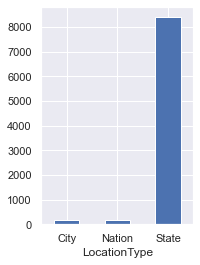

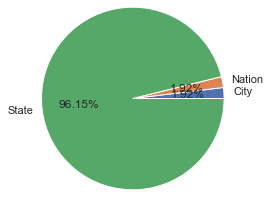

In [16]:
# visualising this result
plt.subplot(1, 2, 1)
sns.set_style('whitegrid')
df_child_number.groupby('LocationType')['Data'].count().plot(kind= 'bar')
plt.xticks(rotation= 'horizontal')
plt.show()

plt.subplot(1, 2, 2)
df_child_number.groupby('LocationType')['Data'].count().plot(kind= 'pie', autopct= '%.2f%%', radius= 1.5)
plt.xticks(rotation= 'horizontal')
plt.show()


# so more then 96% people live in states.

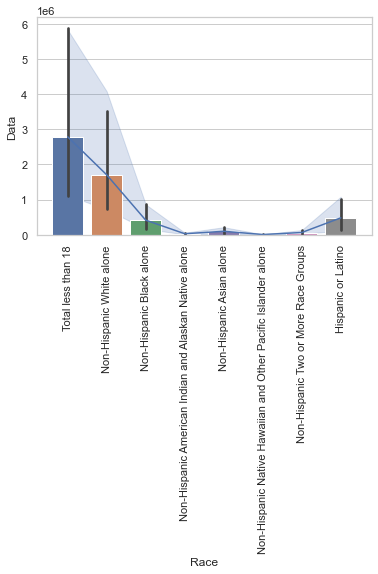

In [17]:
# data of races in 200

sns.barplot(x= df_child_number[df_child_number['TimeFrame'] == 2000]['Race'],
            y= df_child_number['Data'].astype(int))
sns.lineplot(x= df_child_number[df_child_number['TimeFrame'] == 2000]['Race'],
            y= df_child_number['Data'].astype(int))
plt.xticks(rotation= 'vertical')
plt.show()


# so 'Non-Hispanic White alone' are in majority.

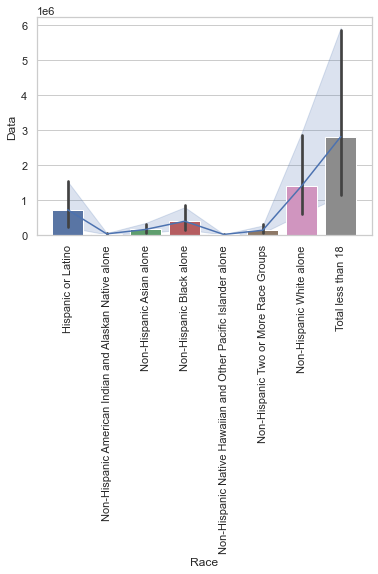

In [18]:
# Checking the same data for year 2019

# data of races in 200

sns.barplot(x= df_child_number[df_child_number['TimeFrame'] == 2019]['Race'],
            y= df_child_number['Data'].astype(int))
sns.lineplot(x= df_child_number[df_child_number['TimeFrame'] == 2019]['Race'],
            y= df_child_number['Data'].astype(int))
plt.xticks(rotation= 'vertical')
plt.show()

# after 10 years, sill 'Non-Hispanic White alone' are in majority

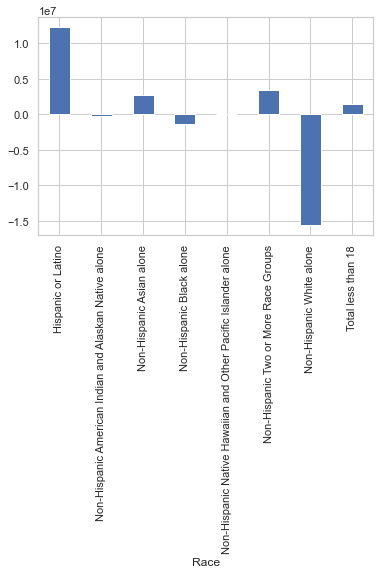

In [19]:
# we can also plot the differences, by this we will be able to analyse that how much the number of each race changed after 10 years.

df_10Years_diff= np.subtract(df_child_number[df_child_number['TimeFrame'] == 2019].groupby('Race')['Data'].sum(),
           df_child_number[df_child_number['TimeFrame'] == 2000].groupby('Race')['Data'].sum())

df_10Years_diff.plot(kind= 'bar')

plt.show()

# so some Races increased while some decreased

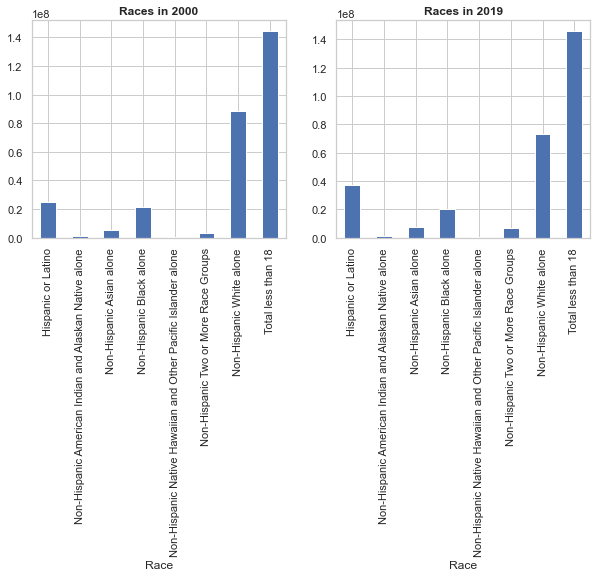

In [20]:
# races according in 2000 and 2019

plt.subplot(1, 2, 1)
df_child_number[df_child_number['TimeFrame'] == 2000].groupby('Race')['Data'].sum().plot(kind= 'bar', figsize= (10, 4))
plt.title('Races in 2000', weight= 'bold')

plt.subplot(1, 2, 2)
df_child_number[df_child_number['TimeFrame'] == 2019].groupby('Race')['Data'].sum().plot(kind= 'bar')
plt.title('Races in 2019', weight= 'bold')


plt.show()

# both of these plots looks identical, but if we look closely we'll find minor changes in some races(specially in 'Hispanic or Latino', 'Non-Hispanic Asian alone', 'Non-Hispanic White alone')

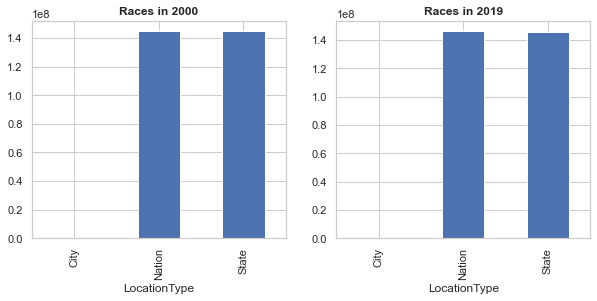

In [21]:
# races according to the LocationType in 2000 and 2019


plt.subplot(1, 2, 1)
df_child_number[df_child_number['TimeFrame'] == 2000].groupby('LocationType')['Data'].sum().plot(kind= 'bar', figsize= (10, 4))
plt.title('Races in 2000', weight= 'bold')

plt.subplot(1, 2, 2)
df_child_number[df_child_number['TimeFrame'] == 2019].groupby('LocationType')['Data'].sum().plot(kind= 'bar')
plt.title('Races in 2019', weight= 'bold')


plt.show()


# looks identical

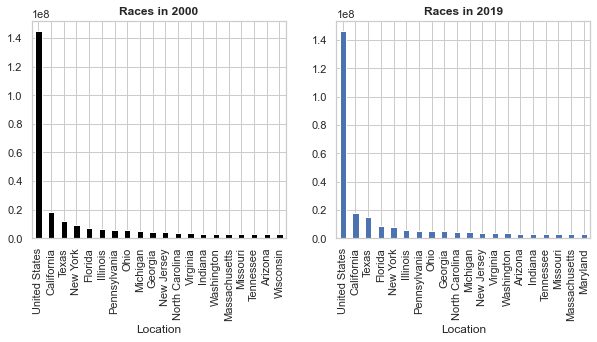

In [22]:
# races according to the LocationType in 2000 and 2019


plt.subplot(1, 2, 1)
df_child_number[df_child_number['TimeFrame'] == 2000].groupby('Location')['Data'].sum().sort_values(ascending= False).head(20).plot(kind= 'bar', figsize= (10, 4), color= 'black')
plt.title('Races in 2000', weight= 'bold')

plt.subplot(1, 2, 2)
df_child_number[df_child_number['TimeFrame'] == 2019].groupby('Location')['Data'].sum().sort_values(ascending= False).head(20).plot(kind= 'bar')
plt.title('Races in 2019', weight= 'bold')


plt.show()

# here i have checked for only top 20 results.
# we can see here that most of the population live in united states.

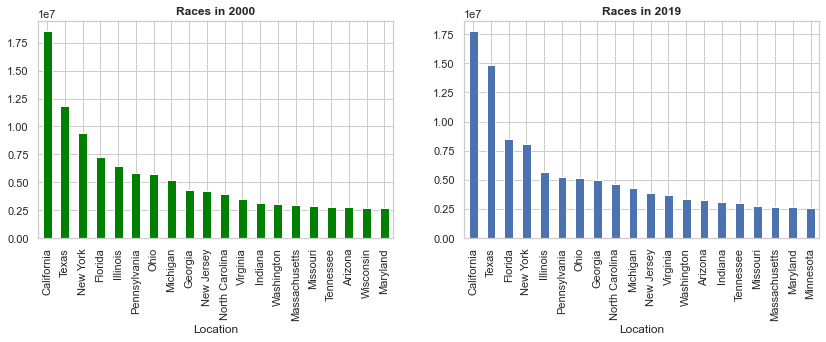

In [23]:
# From the above plot, if we remove United states then we will be able to see more clearly the realtion b/w the population of other places.

plt.subplot(1, 2, 1)
df_child_number[(df_child_number['TimeFrame'] == 2000) & (df_child_number['Location'] != 'United States')].groupby('Location')['Data'].sum().sort_values(ascending= False).head(20).plot(kind= 'bar', figsize= (14, 4), color= 'green')
plt.title('Races in 2000', weight= 'bold')

plt.subplot(1, 2, 2)
df_child_number[(df_child_number['TimeFrame'] == 2019) & (df_child_number['Location'] != 'United States')].groupby('Location')['Data'].sum().sort_values(ascending= False).head(20).plot(kind= 'bar')
plt.title('Races in 2019', weight= 'bold')


plt.show()

# again this data is for top 20 results.
# we can see here that after united states california is highest in terms of races

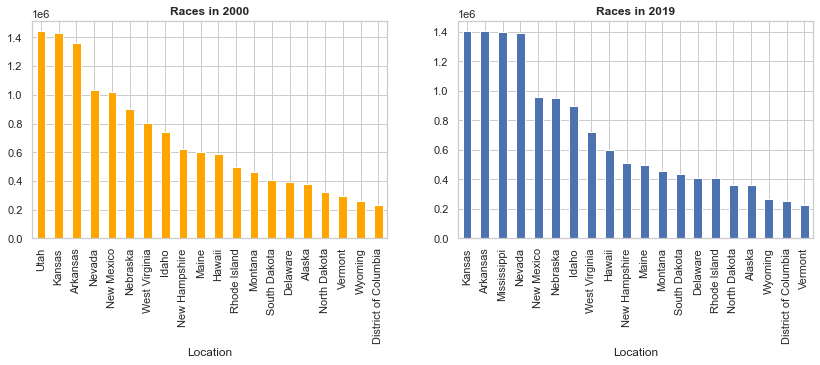

In [24]:
# we can look the same results for bottom 20 results: 

plt.subplot(1, 2, 1)
df_child_number[df_child_number['TimeFrame'] == 2000].groupby('Location')['Data'].sum().sort_values(ascending= False).tail(20).plot(kind= 'bar', figsize= (14, 4), color= 'orange')
plt.title('Races in 2000', weight= 'bold')

plt.subplot(1, 2, 2)
df_child_number[df_child_number['TimeFrame'] == 2019].groupby('Location')['Data'].sum().sort_values(ascending= False).tail(20).plot(kind= 'bar')
plt.title('Races in 2019', weight= 'bold')


plt.show()


# so the lowest one in terms of races(sum) in 2000 was 'District of Columbia' and in 2019 its 'Vermont'

In [25]:
# as we can see from above plot, least ammount of people live in city.
# so lets check the data specially for cities in 2019

df_child_number[(df_child_number['LocationType']=='City')
                & (df_child_number['TimeFrame']== 2019)].sort_values(by= 'Data',ascending= False)

,LocationType,Location,Race,TimeFrame,Data
8399,City,District of Columbia,Total less than 18,2019,127952
8395,City,District of Columbia,Non-Hispanic Black alone,2019,68017
8398,City,District of Columbia,Non-Hispanic White alone,2019,29195
8392,City,District of Columbia,Hispanic or Latino,2019,21756
8397,City,District of Columbia,Non-Hispanic Two or More Race Groups,2019,5575
8394,City,District of Columbia,Non-Hispanic Asian alone,2019,3156
8393,City,District of Columbia,Non-Hispanic American Indian and Alaskan Native alone,2019,200
8396,City,District of Columbia,Non-Hispanic Native Hawaiian and Other Pacific Islander alone,2019,53


In [26]:
# same above result for year 2000(initial year for this dataset)

df_child_number[(df_child_number['LocationType']=='City')
                & (df_child_number['TimeFrame']== 2000)].sort_values(by= 'Data',ascending= False)


# As we can see the highest and lowest are the same(race), there are just slight differnces in the middle.

,LocationType,Location,Race,TimeFrame,Data
72,City,District of Columbia,Total less than 18,2000,114503
74,City,District of Columbia,Non-Hispanic Black alone,2000,85418
73,City,District of Columbia,Non-Hispanic White alone,2000,13828
79,City,District of Columbia,Hispanic or Latino,2000,11463
76,City,District of Columbia,Non-Hispanic Asian alone,2000,1767
78,City,District of Columbia,Non-Hispanic Two or More Race Groups,2000,1732
75,City,District of Columbia,Non-Hispanic American Indian and Alaskan Native alone,2000,245
77,City,District of Columbia,Non-Hispanic Native Hawaiian and Other Pacific Islander alone,2000,50


In [27]:
# checking the states which has lowest difference b/w majority and minority

loc_race= df_child_number[df_child_number['LocationType']=='State'].groupby(['Location', 'Race'])['Data'].sum()
loc_race

Location  Race                                                         
Alabama   Hispanic or Latino                                               1286476
          Non-Hispanic American Indian and Alaskan Native alone             116020
          Non-Hispanic Asian alone                                          266259
          Non-Hispanic Black alone                                         7085771
          Non-Hispanic Native Hawaiian and Other Pacific Islander alone      11129
                                                                            ...   
Wyoming   Non-Hispanic Black alone                                           24833
          Non-Hispanic Native Hawaiian and Other Pacific Islander alone       2130
          Non-Hispanic Two or More Race Groups                               73751
          Non-Hispanic White alone                                         2215079
          Total less than 18                                               2773670
Name: Data, Len

In [28]:
df_child_number.head(5)

,LocationType,Location,Race,TimeFrame,Data
0,Nation,United States,Total less than 18,2000,72376189
1,Nation,United States,Non-Hispanic White alone,2000,44260291
2,Nation,United States,Non-Hispanic Black alone,2000,10747153
3,Nation,United States,Non-Hispanic American Indian and Alaskan Native alone,2000,693726
4,Nation,United States,Non-Hispanic Asian alone,2000,2514659


In [76]:
d= {}

for i in {col[0] for col in list(loc_race.index)}:
    d[i] = (np.subtract(loc_race[i].max(), loc_race[i].min()))

In [180]:
# so which location has minimum difference between majority and minority:

val= 0
key= 'null'

for i in d:
    if val == 0:
        val= d[i]
    elif d[i] <= val:
        val= d[i]
        key= i
    else:
        pass
print('location: '+key, f'\ndifference: {val}')   


# so its Vermont where the difference b/w majorigy and minority is least

location: Vermont 
difference: 2718594


In [188]:
val= 0
key= 'null'

for i in d:
    if val == 0:
        key= i
        val= d[i]
    elif d[i] > val:
        val= d[i]
        key= i          
    else:
        pass
print('location: '+key, f'\ndifference: {val}')    

# and its California where the difference b/w majorigy and minority is highest.

location: California 
difference: 192737281
